In [1]:
import torch

In [2]:
#Create *known* params
weight = 0.7
bias = 0.3

#Create some data
start = 0
end = 20
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim = 1)
Y = weight * X + bias

In [3]:
X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
#Create Train/Test Split
train_split = int(0.7 * len(X)) #roughly 70% of data will be for training
X_train, Y_train = X[:train_split],Y[:train_split]

X_test, Y_test = X[train_split:],Y[train_split:]


In [5]:
import matplotlib.pyplot as plt

In [38]:
def plot_predictions(X_train = X_train, Y_train = Y_train, X_test = X_test, Y_test = Y_test, predictions = None):
    plt.figure()
    plt.scatter(X_train, Y_train, c = "b", s = 4, label = "Training data")
    plt.scatter(X_test, Y_test, c="g", s= 4, label = "Testing data")

    if predictions is not None:
        plt.scatter(X_test, predictions, c = "r",s = 4, label = "Predictions")

    plt.legend()

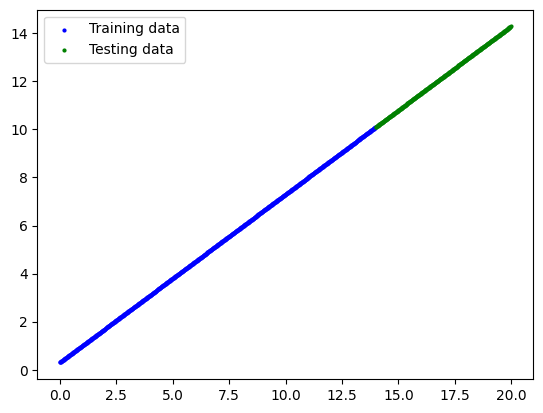

In [7]:
plot_predictions()

In [25]:
from torch import nn as nn #
#Let's build a Linear Reg model class
class LinearRegressionModel(nn.Module): #nn.Module is the base class for all NN modules
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1), requires_grad = True) #Set this param to True since we want to update this nn's parameter using gradient descent
        self.bias = nn.Parameter(torch.randn(1), requires_grad = True) #Same thing with bias

    def forward(self, x):
        return self.weights * x + self.bias #Linear reg formula

## Some Pytorch model building essentials

# torch.nn 
Contains all of the building blocks for computational graphs

# torch.nn.Module
The base class for all neural network modules

# torch.nn.Parameter
Storage of tensors taht can be sued with nn.Module. If 'require_grad = True' gradients are calculated automatically.

# torch.optim
Contains various optimisation algorithms, or learning rate....

# def forward()
Defines the computation that will take place on the data passed to the nn.Module

So in this case of Linear Regression, the tensors/params/variables need to be updated/estimate is the weight and bias of the equation, and the computation in the forward() method is just the entire linear regression

In [28]:
#Let run an example

torch.manual_seed(120504) #Any see of your choice

model_0 = LinearRegressionModel()

In [29]:
list(model_0.parameters())

[Parameter containing:
 tensor([1.5266], requires_grad=True),
 Parameter containing:
 tensor([-0.1108], requires_grad=True)]

In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.5266])), ('bias', tensor([-0.1108]))])

In [31]:
#We can now make some predictions using torch.inference_mode()

with torch.inference_mode():
    y_preds = model_0(X_test)

In [36]:
print("Number of testing samples: ", len(X_test))
print("Number of predictions made: ", len(y_preds))

Number of testing samples:  300
Number of predictions made:  300


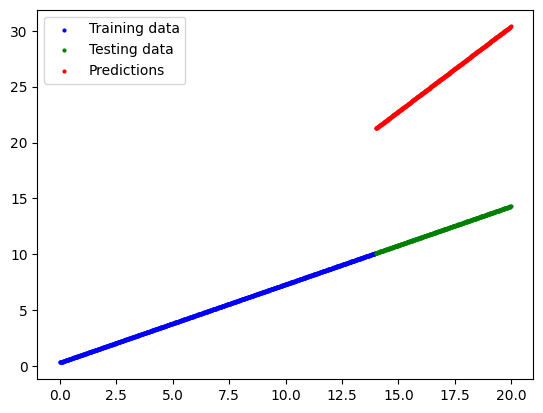

In [39]:
plot_predictions(predictions = y_preds)

In [40]:
# We can see without training, the esimated relationship is so bad

# Train model

We need to define loss function see torch.nn and optimiser see torch.optim


In [54]:
#Create a list of the 3 lost function: MAE, MSE and NLLoss

MAE_loss = nn.L1Loss()
MSE_loss = nn.MSELoss()
NegLog_loss = nn.NLLLoss()
loss_fn_lst = [MAE_loss, MSE_loss, NegLog_loss]

In [57]:
#Create several optimiser as well: Adam, SGD and Rprop
Adam_opt = torch.optim.Adam(params = model_0.parameters(), lr = 0.01)
SGD_opt = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)
Rprop_opt = torch.optim.Rprop(params = model_0.parameters(), lr = 0.01)
optimiser_list = [Adam_opt, SGD_opt, Rprop_opt]

In [ ]:
#Let's start training the model for 100 epochs
def let_s_train(model_0 = model_0, X_train = X_train, loss_fn = None, optimiser = None, Y_train = Y_train, X_test= X_test, Y_test = Y_test ):
    torch.manual_seed(120504)

    epochs = 180 #The model will pass oever the training data 100 time

    #Create empty loss lists to track values

    train_lost_values = []
    test_lost_values = []
    epoch_count = []

    for epoch in range(epochs):
        ###Training
        
        #put model in the training mode
        model_0.train()
        
        y_pred = model_0(X_train)
        
        #calulate the loss
        loss = loss_fn(y_pred,Y_train)
        
        #zero grad of the optimiser
        optimiser.zero_grad()
        
        #loss.backwards
        loss.backward()
        
        optimiser.step()
        
        ###Testing
        
        model_0.eval()
        
        with torch.inference_mode():
            test_pred = model_0(X_test)
            
            test_loss = loss_fn(test_pred, Y_test.type(torch.float))
            
            if epoch %10 == 0:
                epoch_count.append(epoch)
                train_lost_values.append(loss.detach().numpy())
                test_lost_values.append(test_loss.detach().numpy())
                print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")
                
    plt.plot(epoch_count, train_lost_values, label="Train loss")
    plt.plot(epoch_count, test_lost_values, label="Test loss")
    plt.title("Training and test loss curves")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend();
    
    

In [70]:
let_s_train(loss_fn = loss_fn_lst[0], optimiser = optimiser_list[0])

Epoch: 0 | Train Loss: 0.011870614252984524 | Test Loss: 0.009711891412734985
Epoch: 10 | Train Loss: 0.01110133808106184 | Test Loss: 0.014979839324951172
Epoch: 20 | Train Loss: 0.013403167948126793 | Test Loss: 0.041045986115932465
Epoch: 30 | Train Loss: 0.011166955344378948 | Test Loss: 0.008872664533555508
Epoch: 40 | Train Loss: 0.010731584392488003 | Test Loss: 0.013978013768792152
Epoch: 50 | Train Loss: 0.012983758002519608 | Test Loss: 0.03968529775738716
Epoch: 60 | Train Loss: 0.010610061697661877 | Test Loss: 0.008223816752433777
Epoch: 70 | Train Loss: 0.010463729500770569 | Test Loss: 0.013207136653363705
Epoch: 80 | Train Loss: 0.01266483310610056 | Test Loss: 0.038642026484012604
Epoch: 90 | Train Loss: 0.010177066549658775 | Test Loss: 0.007720333524048328
Epoch: 100 | Train Loss: 0.010254224762320518 | Test Loss: 0.012603756971657276
Epoch: 110 | Train Loss: 0.012411602772772312 | Test Loss: 0.03781362622976303
Epoch: 120 | Train Loss: 0.009831060655415058 | Test Lo

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();
